<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/Analise_de_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos fazer uma análise de clustering com o dataset de clientes do e-commerce **"Online Retail"** disponível no Kaggle. Esse dataset contém informações sobre as compras de clientes online, incluindo a data da compra, o valor da compra, o produto comprado, etc.

**Passo 1: Importar bibliotecas e carregar o dataset**



In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
# Carregar o dataset

df = pd.read_excel('online_retail.xlsx')

**Passo 2: Tratar os dados**



In [5]:
# Remover Linhas com Valores Faltantes

df.dropna(inplace=True)

In [7]:
# Converter a coluna 'InvoiceDate' para datatime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [9]:
# Criar uma coluna 'TotalValue' calculando o valor total da compra
df['TotalValue'] = df['Quantity'] * df['Price']

In [13]:
print(df.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country', 'TotalValue'],
      dtype='object')


In [12]:
df = df.rename(columns={'Customer ID': 'CustomerID'})

In [14]:
# Selecionar apenas as colunas relevantes para a análise de clustering
df_cluster = df[['CustomerID', 'TotalValue', 'Quantity']]

**Passo 3: Normalizar os dados**



In [15]:
# Criar um objeto StandardScaler
scaler = StandardScaler()

In [16]:
# Normalizar os dados
df_cluster_scaled = scaler.fit_transform(df_cluster)

**Passo 4: Realizar a análise de clustering com K-Means**



In [17]:
# Criar um objeto KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [18]:
# Realizar o clustering
kmeans.fit(df_cluster_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

**Passo 5: Avaliar a qualidade do clustering**



In [19]:
# Calcular o coeficiente de silhueta
silhouette = silhouette_score(df_cluster_scaled, kmeans.labels_)

print(f'Coeficiente de silhueta: {silhouette:.3f}')


Coeficiente de silhueta: 0.557


**Passo 6: Visualizar os clusters**

In [20]:
# Reduzir a dimensionalidade dos dados para 2D com PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster_scaled)

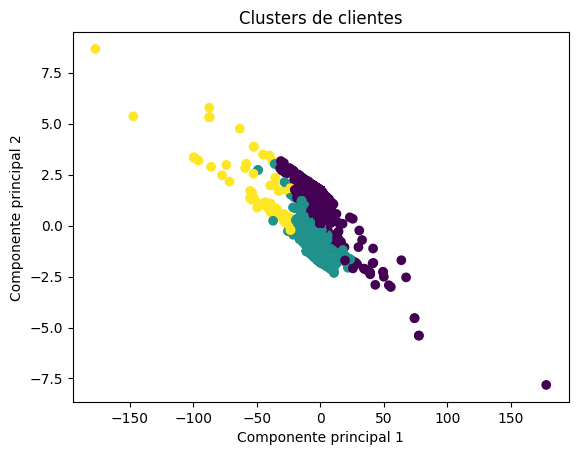

In [21]:
# Plotar os clusters
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('Clusters de clientes')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

O coeficiente de silhueta é uma medida de qualidade do clustering, que varia de -1 a 1. Um valor próximo de 1 indica que os dados estão bem separados em clusters distintos, enquanto um valor próximo de -1 indica que os dados estão misturados e não há uma boa separação entre os clusters.

O coeficiente de silhueta é 0,557, o que é um valor razoável. Isso sugere que os dados estão razoavelmente separados em clusters, mas pode haver algum sobreposição entre os clusters.

Aqui está uma interpretação geral dos valores de coeficiente de silhueta:

- 0,9 a 1,0: Excelente separação entre os clusters

- 0,7 a 0,9: Boa separação entre os clusters

- 0,5 a 0,7: Separação razoável entre os clusters

- 0,3 a 0,5: Separação fraca entre os clusters

- 0 a 0,3: Não há separação entre os clusters

- -1 a 0: Os dados estão misturados e não há separação entre os clusters

No caso, o valor de 0,557 sugere que os dados estão razoavelmente separados em clusters, mas pode haver algum ajuste necessário para melhorar a separação.

Podemos tentar ajustar os parâmetros do algoritmo de clustering, como o número de clusters (n_clusters) ou o método de inicialização (init), para ver se isso melhora a separação dos dados.